In [422]:
# Make some dice

In [423]:
from numpy.random import default_rng

In [424]:
rng = default_rng()

In [425]:
samples = rng.integers(low = 1, high = 6, size = 10, endpoint=True)

In [426]:
print(samples)

[5 4 3 5 5 4 4 2 2 6]


In [427]:
# let's plot dice rolls as historgram

In [428]:
import matplotlib.pyplot as plt
import numpy as np

In [429]:
histo, edges = np.histogram(samples, bins=np.arange(1,8))

In [430]:
print(histo)

[0 2 1 3 3 1]


In [431]:
print(edges)

[1 2 3 4 5 6 7]


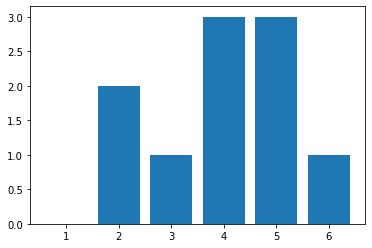

In [432]:
plt.bar(edges[:6], histo)
plt.show()

In [433]:
# Lets roll a few thousand more times

In [434]:
samples_large = rng.integers(low = 1, high = 6, size = 100000, endpoint=True)

In [435]:
histo, edges = np.histogram(samples_large, bins=np.arange(1,8))

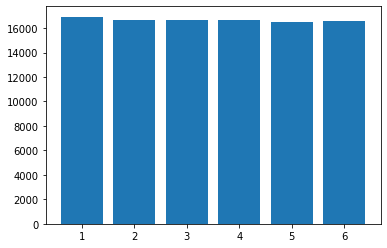

In [436]:
plt.bar(edges[:6], histo)
plt.show()

In [437]:
# mostly uniform
# we could be more rigorous here and see what the deviation is
# also if we take two separate dice and determine what the difference between the die is
# for now let's continue

In [438]:
# measuring values of two indpendent dice rolls added together
# here we expect some non-uniform probability centered around 7
samples_a = rng.integers(low = 1, high = 6, size = 100000, endpoint=True)
samples_b = rng.integers(low = 1, high = 6, size = 100000, endpoint=True)
samples_sum = samples_a+samples_b

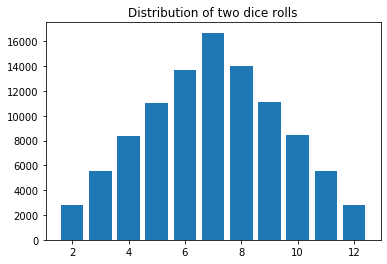

In [439]:
histo, edges = np.histogram(samples_sum, bins=np.arange(2,14))
plt.bar(edges[:11], histo)
plt.title("Distribution of two dice rolls" )
plt.show()

In [440]:
# now let's have our two dice move our piece around the Monopoly board
# each monopoly board has 40 spaces. we will have "Go" be at 0, and "Boardwalk" be at 39

In [441]:
# the space you land on is your current throw, plus all previous throws
# start at 0
space = 0
position_history = [0]
for i in np.arange(len(samples_sum)):
    position_history.append(space + samples_sum[i])
    space += samples_sum[i]
    
print(space)

700919


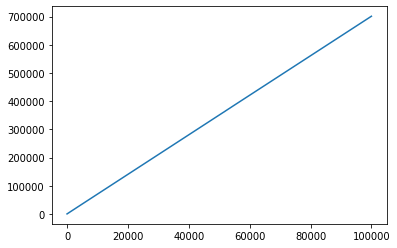

In [442]:
plt.plot(np.arange(len(position_history)), position_history)
plt.show()

In [443]:
# the board is cyclic, so reset every 40 spaces
board_position = np.asarray(position_history)%40

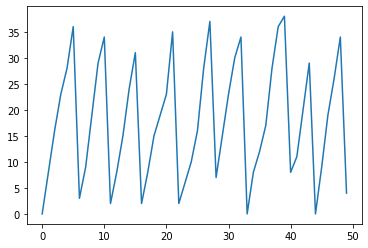

In [444]:
plt.plot(np.arange(len(board_position[:50])), board_position[:50])
plt.show()

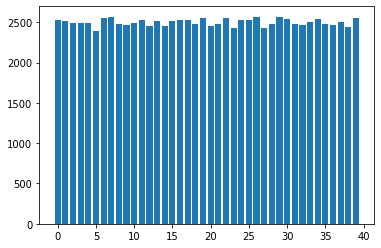

In [445]:
# let's check distribution over all spaces 
histo, edges = np.histogram(board_position, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.show()

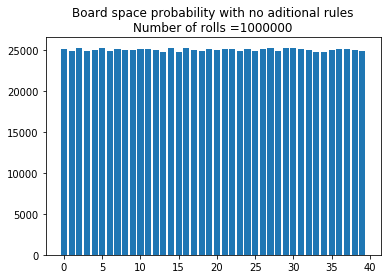

In [446]:
# this looks mostly uniform.
# let's run a couple thousand more times just to make sure
n_rolls = 1000000
samples_a = rng.integers(low = 1, high = 6, size = n_rolls, endpoint=True)
samples_b = rng.integers(low = 1, high = 6, size = n_rolls, endpoint=True)
samples_sum = samples_a+samples_b

space = 0
position_history = [0]
for i in np.arange(len(samples_sum)):
    position_history.append(space + samples_sum[i])
    space += samples_sum[i]
    
board_position = np.asarray(position_history)%40

histo, edges = np.histogram(board_position, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.title("Board space probability with no aditional rules\nNumber of rolls ="+str(n_rolls) )
plt.show()

In [447]:
# looks good
# next is adding in rules about the board
# landing on certain spaces causes you to 'jump' to other spaces
# at this point we need to get a little more sophistocated about our board walking logic

In [448]:
# a turn consists of 
# 1) rolling dice
# 2) moving to a space
# 3) check if there are special rules about that space
# 4) special rules cause you to jump to a new space

In [449]:
# for now let's just add jail
def check_special_rules(space):
    if space == 30:
        return 10
    return space % 40

In [450]:
# while we're at it let's make a helper for dice rolls too
def roll_dice(nrolls = 10000):
    samples_a = rng.integers(low = 1, high = 6, size = nrolls, endpoint=True)
    samples_b = rng.integers(low = 1, high = 6, size = nrolls, endpoint=True)
    samples_sum = samples_a+samples_b
    return samples_sum

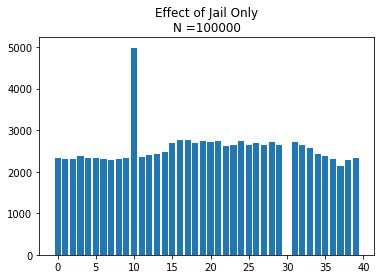

In [451]:
n_rolls = 100000
dice_rolls = roll_dice(n_rolls)

space = 0
board_positions = [0]
for i in np.arange(len(dice_rolls)):
    space = check_special_rules(space + dice_rolls[i])
    board_positions.append(space)

histo, edges = np.histogram(board_positions, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.title("Effect of Jail Only\nN ="+str(n_rolls) )
plt.show()

In [452]:
# alright, interesting things are starting to happen
# you can land on jail while "just visiting", and also immediatly after you land on jail space, so the probability is rightly doubled
# additinoally, the spaces immediatly after jail gain some additional probability, while those immediatly after jail lose some probability

In [453]:
# Let's add some more rules

In [454]:
class Chance:
    def no_move(self, arg):
        return arg
    
    # ride reading railroad
    def rrr_move(self, arg):
        return 4
    
    def go_jail_move(self, arg):
        return 10
    
    # nearest utility
    def n_u_move(self, space):
        if space < 12:
            return 12
        elif space < 28:
            return 28
        else:
            return 12
    
    # nearest railroad
    def n_r_move(self, space):
        if space < 5:
            return 5
        elif space < 15:
            return 15
        elif space < 25:
            return 25
        elif space < 35:
            return 35
        else:
            return 5
        
    def gb3_move(self, space):
        return space - 3
    
    def g2g_move(self, arg):
        return 0
    
    # Illinois Ave.
    def ia_move(self, arg):
        return 24
    
    # St. Charles Place
    def scp_move(self, arg):
        return 11
    
    # Boardwalk
    def b_move(self, arg):
        return 39
    
    deck = {
        0: {
            "name": "Reading Railroad",
            "move": rrr_move
        },
        1: {
            "name": "Property Repairs",
            "move": no_move
        },
        2: {
            "name": "Go To Jail",
            "move": go_jail_move
        },
        3: {
            "name": "Poor Tax",
            "move": no_move
        },
        4: {
            "name": "Nearest Utility",
            "move": n_u_move
        },
        5: {
            "name": "Nearest Railroad",
            "move": n_r_move
        },
        6: {
            # yes there are two of these cards
            "name": "Nearest Railroad 2",
            "move": n_r_move
        },
        7: {
            "name": "Go Back 3",
            "move": gb3_move
        },
        8: {
            "name": "Go to Go",
            "move": g2g_move
        },
        9: {
            "name": "Illinois Ave.",
            "move": ia_move
        },
        10: {
            "name": "St. Charles Place",
            "move": scp_move
        },
        11: {
            "name": "Receive Dividend",
            "move": no_move
        },
        12: {
            "name": "Building and Loan",
            "move": no_move
        },
        13: {
            "name": "Get Out of Jail Free",
            "move": no_move
        },
        14: {
            "name": "Go to Boardwalk",
            "move": b_move
        },
        15: {
            "name": "Elected Chairman",
            "move": no_move
        }
    }
    
    deck_order = np.arange(len(deck))
    position_in_deck = 0
    
    def shuffle_deck(self):
        np.random.shuffle(self.deck_order)
    
    def pick_card(self, space):
        if self.position_in_deck > len(self.deck_order)-1:
            self.shuffle_deck()
            self.position_in_deck = 0
        
        # handle card picking and iterating tasks
        card = self.deck_order[self.position_in_deck]
        self.position_in_deck +=1
        
        # handle card resolution tasks
        new_space = self.deck[card]["move"](self, space)
        
        return new_space

In [455]:
c_deck = Chance()

In [456]:
for i in range(10):
    print(c_deck.pick_card(space = 0))

4
0
10
0
12
5
5
-3
0
24


In [457]:
# For now lets check what chance does without including default jail rules 
def check_special_rules(space):
    # Jail
    # if space == 30:
    #     return 10
    
    # Chance
    if space in [7, 22, 36]:
        new_space = c_deck.pick_card(space)
        if new_space != space:
            return check_special_rules(new_space) % 40
        else:
            return new_space % 40
    
    return space % 40

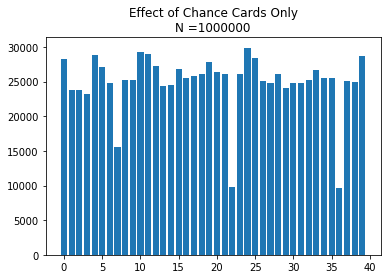

In [458]:
n_rolls = 1000000
dice_rolls = roll_dice(n_rolls)

space = 0
board_positions = [0]
for i in np.arange(len(dice_rolls)):
    space = check_special_rules(space + dice_rolls[i])
    board_positions.append(space)

histo, edges = np.histogram(board_positions, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.title("Effect of Chance Cards Only\nN ="+str(n_rolls) )
plt.show()

In [459]:
# And now including chance and jail 
def check_special_rules(space):
    # Jail
    if space == 30:
        return 10
    
    # Chance
    if space in [7, 22, 36]:
        new_space = c_deck.pick_card(space)
        if new_space != space:
            return check_special_rules(new_space) % 40
        else:
            return new_space % 40
    
    return space % 40

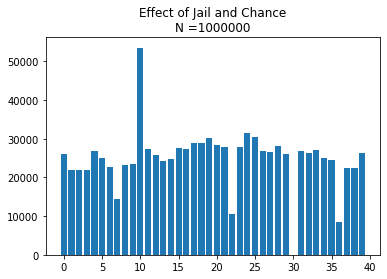

In [460]:
n_rolls = 1000000
dice_rolls = roll_dice(n_rolls)

space = 0
board_positions = [0]
for i in np.arange(len(dice_rolls)):
    space = check_special_rules(space + dice_rolls[i])
    board_positions.append(space)

histo, edges = np.histogram(board_positions, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.title("Effect of Jail and Chance\nN ="+str(n_rolls) )
plt.show()

In [461]:
class CommunityChest:
    def no_move(self, arg):
        return arg
    
    def go_jail_move(self, arg):
        return 10
    
    def g2g_move(self, arg):
        return 0
    
    deck = {
        0: {
            "name": "Life Insurance",
            "move": no_move
        },
        1: {
            "name": "Bank Error",
            "move": no_move
        },
        2: {
            "name": "Go To Jail",
            "move": go_jail_move
        },
        3: {
            "name": "Collect $50 From Every Player",
            "move": no_move
        },
        4: {
            "name": "Pay Hospital",
            "move": no_move
        },
        5: {
            "name": "XMAS Fund Matures",
            "move": no_move
        },
        6: {
            "name": "Get Out of Jail Free",
            "move": no_move
        },
        7: {
            "name": "Pay School Tax",
            "move": no_move
        },
        8: {
            "name": "Inherit $100",
            "move": no_move
        },
        9: {
            "name": "Go to Go",
            "move": g2g_move
        },
        10: {
            "name": "Doctor's Fee",
            "move": no_move
        },
        11: {
            "name": "Receive For Services",
            "move": no_move
        },
        12: {
            "name": "Assessed Street Repairs",
            "move": no_move
        },
        13: {
            "name": "Beauty Contest",
            "move": no_move
        },
        14: {
            "name": "Sale of Stock",
            "move": no_move
        },
        15: {
            "name": "Income Tax Refund",
            "move": no_move
        }
    }
    
    deck_order = np.arange(len(deck))
    position_in_deck = 0
    
    def shuffle_deck(self):
        np.random.shuffle(self.deck_order)
    
    def pick_card(self, space):
        if self.position_in_deck > len(self.deck_order)-1:
            self.shuffle_deck()
            self.position_in_deck = 0
        
        # handle card picking and iterating tasks
        card = self.deck_order[self.position_in_deck]
        self.position_in_deck +=1
        
        # handle card resolution tasks
        new_space = self.deck[card]["move"](self, space)
        
        return new_space

In [462]:
cc_deck = CommunityChest()

In [463]:
# Let's look at just Community Chest
def check_special_rules(space):
    # Jail
    #if space == 30:
    #    return 10
    
    # Chance
    #if space in [7, 22, 36]:
    #    new_space = c_deck.pick_card(space)
    #    if new_space != space:
    #        return check_special_rules(new_space) % 40
    #    else:
    #        return new_space % 40
        
    # Community Chest
    if space in [2, 17, 33]:
        new_space = cc_deck.pick_card(space)
        if new_space != space:
            return check_special_rules(new_space) % 40
        else:
            return new_space % 40
    
    return space % 40

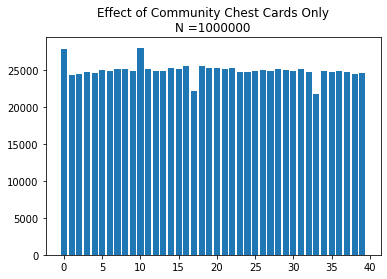

In [464]:
n_rolls = 1000000
dice_rolls = roll_dice(n_rolls)

space = 0
board_positions = [0]
for i in np.arange(len(dice_rolls)):
    space = check_special_rules(space + dice_rolls[i])
    board_positions.append(space)

histo, edges = np.histogram(board_positions, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.title("Effect of Community Chest Cards Only\nN ="+str(n_rolls) )
plt.show()

In [465]:
# Let's look at just Community Chest
def check_special_rules(space):
    # Jail
    if space == 30:
        return 10
    
    # Chance
    if space in [7, 22, 36]:
        new_space = c_deck.pick_card(space)
        if new_space != space:
            return check_special_rules(new_space) % 40
        else:
            return new_space % 40
        
    # Community Chest
    if space in [2, 17, 33]:
        new_space = cc_deck.pick_card(space)
        if new_space != space:
            return check_special_rules(new_space) % 40
        else:
            return new_space % 40
    
    return space % 40

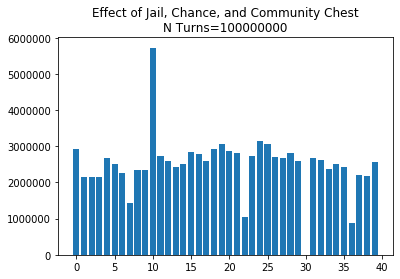

In [466]:
n_rolls = 100000000
dice_rolls = roll_dice(n_rolls)

space = 0
board_positions = [0]
for i in np.arange(len(dice_rolls)):
    space = check_special_rules(space + dice_rolls[i])
    board_positions.append(space)

histo, edges = np.histogram(board_positions, bins=np.arange(41))
plt.bar(edges[:40], histo)
plt.title("Effect of Jail, Chance, and Community Chest\nN Turns="+str(n_rolls) )
plt.show()

In [467]:
# Let's start putting space names in
game_board = {
    0: {
        "name": "Go",
        "color": "Black"
    },
    1: {
        "name": "Mediteranean Ave",
        "color": "Purple"
    },
    2: {
        "name": "Community Chest",
        "color": "Black"
    },
    3: {
        "name": "Baltic Ave",
        "color": "Purple"
    },
    4: {
        "name": "Income Tax",
        "color": "Black"
    },
    5: {
        "name": "Reading Railroad",
        "color": "gray"
    },
    6: {
        "name": "Oriental Ave", 
        "color": "cyan"
    },
    7: {
        "name": "Chance",
        "color": "pink"
    },
    8: {
        "name": "Vermont Ave",
        "color": "cyan"
    },
    9: {
        "name": "Connecticut Ave",
        "color": "cyan"
    },
    10: {
        "name": "Jail",
        "color": "black"
    },
    11: {
        "name": "St. Charles Place",
        "color": "magenta"
    },
    12: {
        "name": "Electric Company",
        "color": "brown"
    },
    13: {
        "name": "States Ave",
        "color": "magenta"
    },
    14: {
        "name": "Virginia Ave",
        "color": "magenta"
    },
    15: {
        "name": "Pensylvania Railroad",
        "color": "gray"
    },
    16: {
        "name": "St. James Place",
        "color": "orange"
    },
    17: {
        "name": "Community Chest",
        "color": "black"
    },
    18: {
        "name": "Tennessee Ave",
        "color": "orange"
    },
    19: {
        "name": "New York Ave",
        "color": "orange"
    },
    20: {
        "name": "Free Parking",
        "color": "black"
    },
    21: {
        "name": "Kentucky Ave",
        "color": "red"
    },
    22: {
        "name": "Chance",
        "color": "pink"
    },
    23: {
        "name": "Indiana Ave",
        "color": "red"
    },
    24: {
        "name": "Illinois Ave",
        "color": "red"
    },
    25: {
        "name": "B&O Railroad",
        "color": "gray"
    },
    26: {
        "name": "Atlantic Ave",
        "color": "yellow"
    },
    27: {
        "name": "Ventnor Ave",
        "color": "yellow"
    },
    28: {
        "name": "Water Works",
        "color": "brown"
    },
    29: {
        "name": "Marvin Gardens",
        "color": "yellow"
    },
    30: {
        "name": "Go To Jail",
        "color": "black"
    },
    31: {
        "name": "Pacific Ave",
        "color": "green"
    },
    32: {
        "name": "North Carolina Ave",
        "color": "green"
    },
    33: {
        "name": "Community Chest",
        "color": "black"
    },
    34: {
        "name": "Pennsylvania Ave",
        "color": "green"
    },
    35: {
        "name": "Short Line Railroad",
        "color": "gray"
    },
    36: {
        "name": "Chance",
        "color": "pink"
    },
    37: {
        "name": "Park Place",
        "color": "blue"
    },
    38: {
        "name": "Luxury Tax",
        "color": "black"
    },
    39: {
        "name": "Boardwalk",
        "color": "blue"
    }
}

In [468]:
x_labels = []
x_label_colors = []
for i in range(40):
    x_labels.append(game_board[i]["name"])
    x_label_colors.append(game_board[i]["color"])

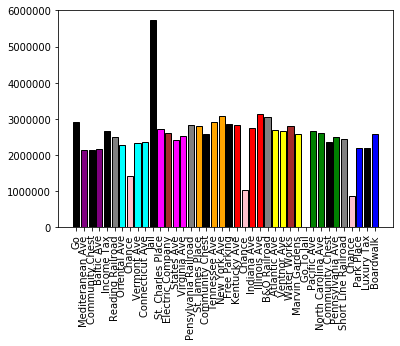

In [469]:
plt.bar(edges[:40], histo, color = x_label_colors, edgecolor='black')
plt.xticks(np.arange(40), x_labels, rotation=90)
plt.show()

In [470]:
# next let's find average of all ownable properties
total = 0
possible_properties = [1, 3, 5, 6, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 37, 39]
for i in possible_properties:
    total += histo[i]

average = total / len(possible_properties)
print(average)

2614096.535714286


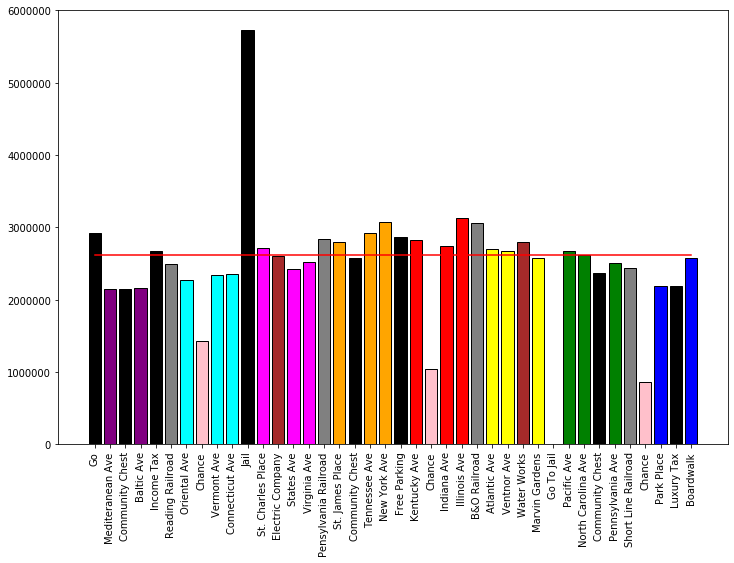

In [471]:
plt.figure(figsize=(12,8))
plt.bar(edges[:40], histo, color = x_label_colors, edgecolor='black')
plt.plot([0, 39],[average, average], color='red')
plt.xticks(np.arange(40), x_labels, rotation=90)

plt.show()